CHAPTER 1:

Introduction

1.1 Problem Statement

1.2 Data

In [1]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

D:\Users\ApurvKumar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
absenteeism_data = pd.read_csv("Absenteeism_at_work.csv")

In [3]:
absenteeism_data.iloc[105,]

ID                                  10
Reason for absence                  22
Month of absence                    12
Day of the week                      4
Seasons                              4
Transportation expense             361
Distance from Residence to Work     52
Service time                         3
Age                                 28
Work load Average/day              NaN
Hit target                          97
Disciplinary failure                 0
Education                            1
Son                                  1
Social drinker                       1
Social smoker                        0
Pet                                  4
Weight                              80
Height                             172
Body mass index                     27
Absenteeism time in hours            8
Name: 105, dtype: object

In [4]:
print(absenteeism_data.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


CHAPTER 2:

Methodology

2.1 Preprocessing


In [5]:
absenteeism_data = absenteeism_data.rename(columns = {'Work load Average/day ': 'Workload'})

In [6]:
absenteeism_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [7]:
for i in range(0,absenteeism_data.shape[0]):
    try:
        absenteeism_data['Workload'].loc[i] = absenteeism_data['Workload'].loc[i].replace(',','')
    except:
        continue

D:\Users\ApurvKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2.1.1 Missing Value Analysis:

In [8]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(absenteeism_data.isnull().sum())

In [9]:
missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Workload,10


In [10]:
#Reset index
missing_val = missing_val.reset_index()

In [59]:
missing_val

,Predictors,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Workload,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [11]:
#Rename variable to proper format
missing_val = missing_val.rename(columns = {'index': 'Predictors', 0: 'Missing_percentage'})

#Calculate percentage of missing values for each variable
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(absenteeism_data))*100

#Arranging in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [12]:
missing_val

,Predictors,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Workload,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [13]:
absenteeism_data['Body mass index'].loc[0] = np.nan

D:\Users\ApurvKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
absenteeism_data['Body mass index'].loc[0]

nan

In [15]:
#absenteeism_data['Body mass index'] = absenteeism_data['Body mass index'].fillna(absenteeism_data['Body mass index'].mean())

In [16]:
absenteeism_data['Body mass index'].loc[0]

nan

In [17]:
#absenteeism_data['Body mass index'] = absenteeism_data['Body mass index'].fillna(absenteeism_data['Body mass index'].median())

In [18]:
absenteeism_data['Body mass index'].loc[0]

nan

In [19]:
absenteeism_data = pd.DataFrame(KNN(k = 3).complete(absenteeism_data), columns = absenteeism_data.columns)

#remove the rows correpondign to dependent values which are null. Leads to incorrect training

Imputing row 1/740 with 1 missing, elapsed time: 0.340
Imputing row 101/740 with 1 missing, elapsed time: 0.441
Imputing row 201/740 with 0 missing, elapsed time: 0.443
Imputing row 301/740 with 0 missing, elapsed time: 0.444
Imputing row 401/740 with 0 missing, elapsed time: 0.445
Imputing row 501/740 with 0 missing, elapsed time: 0.445
Imputing row 601/740 with 0 missing, elapsed time: 0.446
Imputing row 701/740 with 0 missing, elapsed time: 0.446


In [20]:
absenteeism_data['Body mass index'].loc[0]

29.870782172889058

In [21]:
absenteeism_data.to_csv("Absenteeism_updated.csv", index = False)

2.1.2 Outlier Analysis:

In [22]:
cnames = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Workload", "Hit target", "Weight", "Height", "Body mass index"]

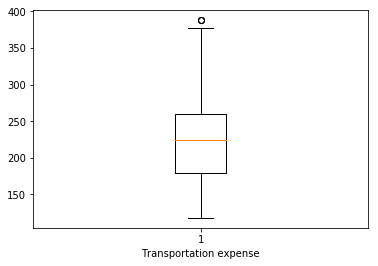

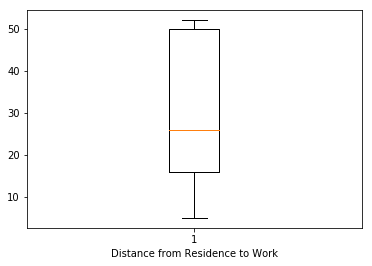

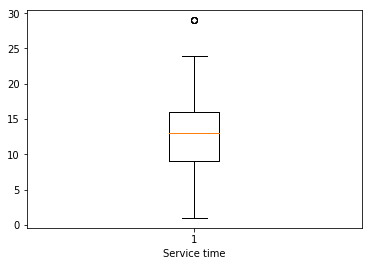

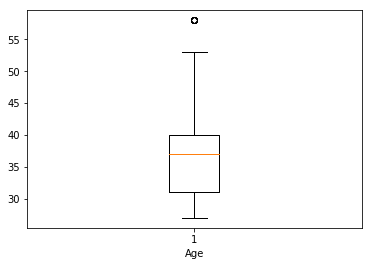

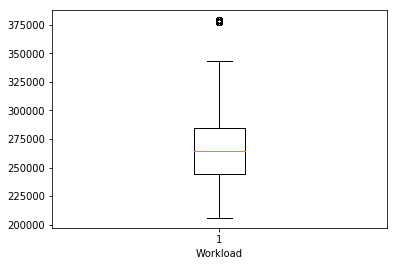

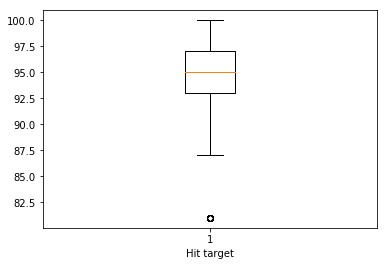

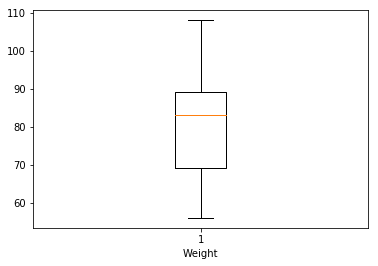

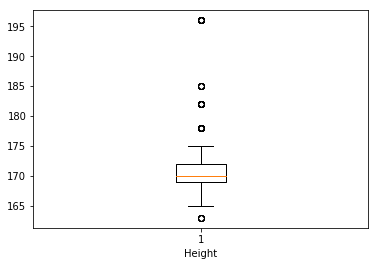

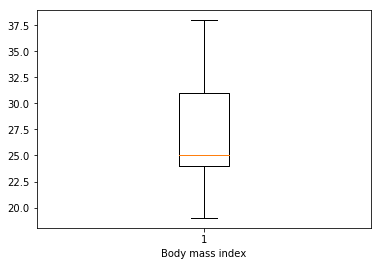

In [23]:
for i in cnames:
    mpl_ax = plt.figure()
    ax = mpl_ax.add_subplot(111)
    ax.boxplot(absenteeism_data[i])
    ax.set_xlabel(i)
    plt.show()

In [24]:
for i in cnames:
    print(i)
    q75, q25 = np.percentile(absenteeism_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min_level = q25 - (iqr*1.5)
    max_level = q75 + (iqr*1.5)
    print(min_level)
    print(max_level)
    
    absenteeism_data = absenteeism_data.drop(absenteeism_data[absenteeism_data.loc[:,i] < min_level].index)
    absenteeism_data = absenteeism_data.drop(absenteeism_data[absenteeism_data.loc[:,i] > max_level].index)

Transportation expense
57.5
381.5
Distance from Residence to Work
-35.0
101.0
Service time
-1.5
26.5
Age
17.5
53.5
Workload
183688.0
345552.0
Hit target
86.99999621817875
103.00000630303543
Weight
39.0
119.0
Height
164.5
176.5
Body mass index
11.217379419837052
42.867825556721165


In [25]:
absenteeism_data.shape

(570, 21)

2.1.3 Feature Selection

In [26]:
##Correlation analysis
#Correlation plot
df_corr = absenteeism_data.loc[:,cnames]

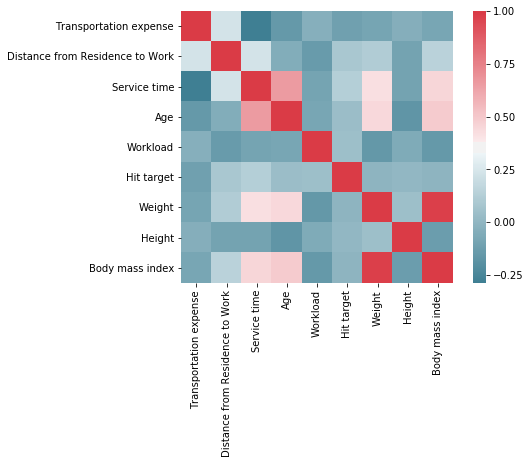

In [27]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [28]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["Reason for absence", "Month of absence", "Day of the week", "Seasons", "Disciplinary failure", "Education", "Son", "Social drinker", "Social smoker", "Pet"]

In [29]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(absenteeism_data['Absenteeism time in hours'], absenteeism_data[i]))
    print(p)

Reason for absence
1.2415113115449792e-62
Month of absence
0.00013981276949536167
Day of the week
0.1165073435130744
Seasons
7.905112809814826e-05
Disciplinary failure
1.362786558952351e-64
Education
1.0
Son
4.0026627157919955e-06
Social drinker
0.5105602652535947
Social smoker
0.06889337951144041
Pet
0.04882036309194913


In [30]:
absenteeism_data = absenteeism_data.drop(['ID','Service time', 'Age', 'Weight', 'Education', 'Social smoker', 'Social drinker', 'Day of the week','Pet'], axis = 1)

In [31]:
absenteeism_data.head()

,Reason for absence,Month of absence,Seasons,Transportation expense,Distance from Residence to Work,Workload,Hit target,Disciplinary failure,Son,Height,Body mass index,Absenteeism time in hours
0,26.0,7.0,1.0,289.0,36.0,239554.0,97.0,0.0,2.0,172.0,29.870782,4.000000
2,23.0,7.0,1.0,179.0,51.0,239554.0,97.0,0.0,0.0,170.0,31.000000,2.000000
3,7.0,7.0,1.0,279.0,5.0,239554.0,97.0,0.0,2.0,168.0,24.000000,4.000000
4,23.0,7.0,1.0,289.0,36.0,239554.0,97.0,0.0,2.0,172.0,30.000000,2.000000
5,23.0,7.0,1.0,179.0,51.0,239554.0,97.0,0.0,0.0,170.0,31.000000,2.000009


2.1.4 Feature scaling

In [32]:
absenteeism_data.columns

Index(['Reason for absence', 'Month of absence', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Workload',
       'Hit target', 'Disciplinary failure', 'Son', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

2.1.5 Normalization

In [33]:
cnames = ["Transportation expense", "Distance from Residence to Work", "Workload", "Hit target", "Height", "Body mass index"]

In [34]:
for i in cnames:
    print(i)
    absenteeism_data[i] = (absenteeism_data[i] - min(absenteeism_data[i]))/(max(absenteeism_data[i]) - min(absenteeism_data[i]))

Transportation expense
Distance from Residence to Work
Workload
Hit target
Height
Body mass index


In [35]:
absenteeism_data[cnames].head()

,Transportation expense,Distance from Residence to Work,Workload,Hit target,Height,Body mass index
0,0.657692,0.659574,0.244925,0.769231,0.7,0.572146
2,0.234615,0.978723,0.244925,0.769231,0.5,0.631579
3,0.619231,0.000000,0.244925,0.769231,0.3,0.263158
4,0.657692,0.659574,0.244925,0.769231,0.7,0.578947
5,0.234615,0.978723,0.244925,0.769231,0.5,0.631579


In [36]:
absenteeism_data.to_csv("Absenteeism_updated.csv", index = False)

MODEL DEVELOPMENT

In [37]:
absenteeism_data.head()

,Reason for absence,Month of absence,Seasons,Transportation expense,Distance from Residence to Work,Workload,Hit target,Disciplinary failure,Son,Height,Body mass index,Absenteeism time in hours
0,26.0,7.0,1.0,0.657692,0.659574,0.244925,0.769231,0.0,2.0,0.7,0.572146,4.000000
2,23.0,7.0,1.0,0.234615,0.978723,0.244925,0.769231,0.0,0.0,0.5,0.631579,2.000000
3,7.0,7.0,1.0,0.619231,0.000000,0.244925,0.769231,0.0,2.0,0.3,0.263158,4.000000
4,23.0,7.0,1.0,0.657692,0.659574,0.244925,0.769231,0.0,2.0,0.7,0.578947,2.000000
5,23.0,7.0,1.0,0.234615,0.978723,0.244925,0.769231,0.0,0.0,0.5,0.631579,2.000009


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn import tree

D:\Users\ApurvKumar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
X = absenteeism_data.values[:,0:11]

In [40]:
Y = absenteeism_data.values[:,11]

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

Decision Tree

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
DT_model = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [44]:
DT_Predictions = DT_model.predict(X_test)

In [45]:
print(mean_squared_error(DT_Predictions,y_test))


#R squared is astandard way of figuring out the goodness. 1 is good.


143.54366938971123


In [46]:
DT_model.feature_importances_

array([0.33736573, 0.00565823, 0.09321333, 0.10383165, 0.11073083,
       0.20300907, 0.06336889, 0.        , 0.03793022, 0.00758283,
       0.03730922])

Random Forest

In [47]:
RF_model = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)

In [48]:
RF_Predictions = RF_model.predict(X_test)

In [49]:
RF_model.feature_importances_

array([0.31326221, 0.05645293, 0.0574129 , 0.07096171, 0.16682385,
       0.15181523, 0.05898596, 0.0140303 , 0.03523906, 0.04010554,
       0.03491031])

In [50]:
print(mean_squared_error(RF_Predictions,y_test))

121.01841659070183


Text(0,0.5,'Frequency')

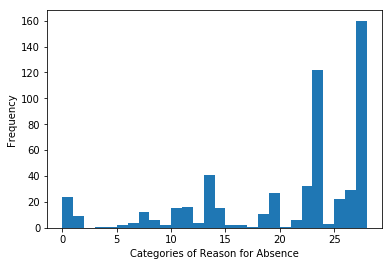

In [51]:
plt.hist(absenteeism_data['Reason for absence'], bins = 28)
plt.xlabel("Categories of Reason for Absence")
plt.ylabel("Frequency")

In [52]:
absenteeism_data = pd.read_csv("Absenteeism_updated.csv")

In [53]:
absenteeism_data = absenteeism_data.drop(['Absenteeism time in hours'], axis = 1)

In [54]:
absenteeism_data.head()

,Reason for absence,Month of absence,Seasons,Transportation expense,Distance from Residence to Work,Workload,Hit target,Disciplinary failure,Son,Height,Body mass index
0,26.0,7.0,1.0,0.657692,0.659574,0.244925,0.769231,0.0,2.0,0.7,0.572146
1,23.0,7.0,1.0,0.234615,0.978723,0.244925,0.769231,0.0,0.0,0.5,0.631579
2,7.0,7.0,1.0,0.619231,0.000000,0.244925,0.769231,0.0,2.0,0.3,0.263158
3,23.0,7.0,1.0,0.657692,0.659574,0.244925,0.769231,0.0,2.0,0.7,0.578947
4,23.0,7.0,1.0,0.234615,0.978723,0.244925,0.769231,0.0,0.0,0.5,0.631579


In [55]:
absenteeism_data.columns

Index(['Reason for absence', 'Month of absence', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Workload',
       'Hit target', 'Disciplinary failure', 'Son', 'Height',
       'Body mass index'],
      dtype='object')

In [56]:
absenteeism_data.loc[0]

Reason for absence                 26.000000
Month of absence                    7.000000
Seasons                             1.000000
Transportation expense              0.657692
Distance from Residence to Work     0.659574
Workload                            0.244925
Hit target                          0.769231
Disciplinary failure                0.000000
Son                                 2.000000
Height                              0.700000
Body mass index                     0.572146
Name: 0, dtype: float64

In [57]:
df = pd.DataFrame(columns = ['Reason for absence', 'Month of absence', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Workload',
       'Hit target', 'Disciplinary failure', 'Son', 'Height',
       'Body mass index'])

In [58]:
for month in range(1,13):
    df = pd.DataFrame(columns = ['Reason for absence', 'Month of absence','Seasons',
       'Transportation expense', 'Distance from Residence to Work', 'Workload',
       'Hit target', 'Disciplinary failure', 'Son','Height',
       'Body mass index'])
    for i in range(0,absenteeism_data.shape[0]):
        if(absenteeism_data['Month of absence'][i] == month):
            df = df.append(absenteeism_data.loc[i])
    RF_Predictions = RF_model.predict(df)
    print("Month: ", month)
    print("Losses to company: ", sum(RF_Predictions))

Month:  1
Losses to company:  209.70413453845828
Month:  2
Losses to company:  258.2979086968285
Month:  3
Losses to company:  885.706399798027
Month:  4
Losses to company:  334.8508070640452
Month:  5
Losses to company:  213.91896030577263
Month:  6
Losses to company:  171.56104315290224
Month:  7
Losses to company:  538.9668544710644
Month:  8
Losses to company:  257.81259019798813
Month:  9
Losses to company:  135.67069197189232
Month:  10
Losses to company:  375.08391081724085
Month:  11
Losses to company:  371.6762548307265
Month:  12
Losses to company:  312.04370287843426
